In [14]:
import csv

DIR='../Data/'
f = open(DIR+'subwaytime.csv', encoding='euc_kr')
data = csv.reader(f)
header = next(data)
print(header)
i = 0
for row in data:
    print(row)
    if i >5:
        break
    i += 1
f.close()

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['Jun-22', '1호선', '150', '서울역', '646', '24', '8433', '7694', '126

In [3]:
def func(x):
    return x**2

a = [1, 2, 3, 4]
a = list(map(func, a))   # 각 숫자의 제곱
print(a)

data = ['1', '2', '3', '4']
data = list(map(int, data))   # 문자를 정수로 변환
print(data)

[1, 4, 9, 16]
[1, 2, 3, 4]


In [4]:
import csv

result = []
total_number = 0

with open(DIR+'subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)   # 2줄의 헤더 정보를 건너뜀
    next(data)
    
    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        
print('총 지하철 역의 수:', len(result))
print('새벽 4시 승차인원: {:,}'.format(total_number))

총 지하철 역의 수: 615
새벽 4시 승차인원: 135,398


In [5]:
import csv
import matplotlib.pyplot as plt

with open(DIR+'subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)    # 2줄의 헤더 정보 건너뜀
    next(data)
    result = []
    total_number = 0
    max_num = 0
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        if(row[4] > max_num):
            max_num = row[4]
            max_station = row[3]

print('새벽 4시 승차 인원수: {0:,}'.format(total_number))
print('최대 승차역: {0}, 인원수:{1:,}'.format(max_station, max_num))

새벽 4시 승차 인원수: 135,398
최대 승차역: 구로, 인원수:11,784


<BarContainer object of 615 artists>

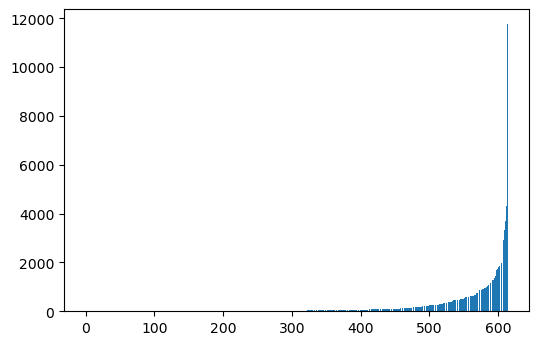

In [6]:
result.sort()   # 오름 차순으로 정렬, 내림차순: result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)

최대 승차 인원역: 신림(2호선) 638,753


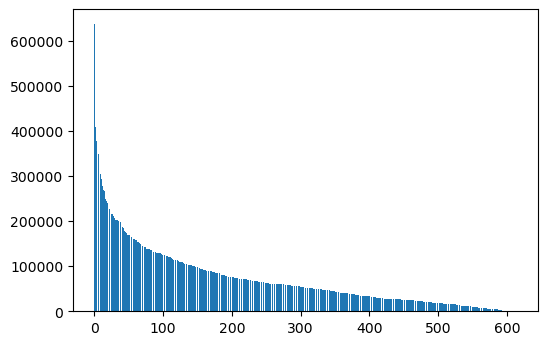

In [7]:
import csv
import matplotlib.pyplot as plt
with open(DIR+'subwaytime.csv') as f:
    data = csv.reader(f)
    next(data) # 2줄의 헤더 정보 건너뜀
    next(data)
    result = []
    total_number = 0
    max_num = 0
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2]) # index 10, 12, 14
        # row_sum = row[10] + row[12] + row[14]
        result.append(row_sum)
        if row_sum > max_num:
            max_num = row_sum
            max_station = row[3] + '(' + row[1] + ')'

print('최대 승차 인원역: {0} {1:,}'.format(max_station, max_num))
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.show()

In [9]:
# 시간대별 가장 많이 승차하는 역 정보 분석
import csv
import matplotlib.pyplot as plt
import platform

with open(DIR+'subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    max =[0] * 23 # 새벽 3시는 지하철 운행 안함
    max_station = [''] * 23
    xtick_list = []
    
    for i in range(4, 27):
        n = i % 24 # 4, 5, 6, ... 23, 0, 1, 2시로 표시
        xtick_list.append(str(n))

    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j * 2 + 4] # j=0: data[j*2+4]의 값을 max[0]에 저장하기 위함
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + '시:' + row[3] # 4시: 구로

for i in range(len(max)):
    print('{0}: {1:,}'.format(max_station[i], max[i]), end=', ')
    if (i+1) % 4 == 0: # 한 줄에 6개씩 출력
        print()

4시:구로: 11,784, 5시:신림: 38,809, 6시:신림: 73,523, 7시:신림: 188,110, 
8시:신림: 281,017, 9시:신림: 169,626, 10시:신림: 91,989, 11시:신림: 77,496, 
12시:잠실(송파구청): 84,383, 13시:강남: 95,697, 14시:강남: 106,394, 15시:강남: 131,625, 
16시:강남: 154,526, 17시:강남: 231,839, 18시:강남: 314,775, 19시:강남: 196,425, 
20시:강남: 155,347, 21시:강남: 180,108, 22시:강남: 176,473, 23시:강남: 81,016, 
0시:강남: 12,407, 1시:건대입구: 8, 2시:동묘앞: 1, 

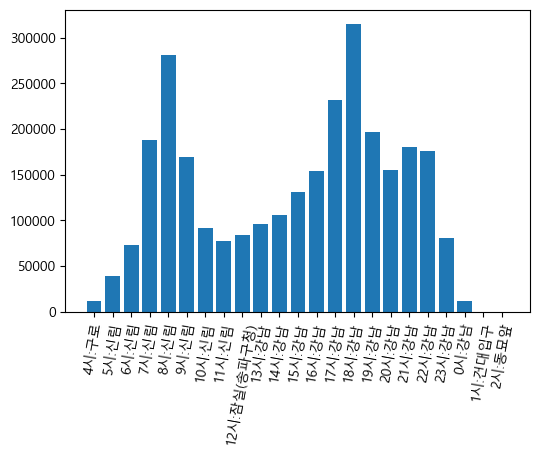

In [10]:
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')

plt.figure(dpi=100)
plt.bar(range(23), max)
plt.xticks(range(23), max_station, rotation=80)
plt.show()

In [12]:
import operator
names = {'Mary':10999, 'Sams':2111, 'Aimy':9778, 'Tom':20245,
         'Michale':27115, 'Bob':5887, 'Kelly':7855}

# Key를 기준으로 정렬 (기본: 오름차순)
print("dict 정렬: key기준 오름차순")
res = sorted(names.items(), key=(lambda x: x[0]))
print(res)

# Value를 기준으로 정렬, 내림차순: reverse=True
print("dict정렬: value기준, 내림차순")
res = sorted(names.items(), value=(lambda x: x[1]), reverse=True)
print(res)

print()

# key를 기준으로 정렬 (오름차순)
sorted_x = sorted(names.items(), key=operator.itemgetter(0))
print(sorted_x)
print()

# value를 기준으로 정렬 (내림차순)
sorted_x = sorted(names.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_x)

dict 정렬: key기준 오름차순
[('Aimy', 9778), ('Bob', 5887), ('Kelly', 7855), ('Mary', 10999), ('Michale', 27115), ('Sams', 2111), ('Tom', 20245)]
dict정렬: value기준, 내림차순


TypeError: 'value' is an invalid keyword argument for sort()